# Project - AllLife Bank Unsupervised Learning : `Customer Segmentation`

## Description

- AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. 

- Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. 

- Another insight from the market research was that the customers perceive the support services of the back poorly. 

Based on this, **the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster.** Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.



## Dataset 
ALLLife bank
Data Description: 


Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

- Customer Key : Cudtomer Identification Number
- Avg_Credit_Limit : Average Credit Card limit
- Total_Credit_Cards : the total number of credit cards the customer has.
- Total_visits_bank : Number of times customer has visited the bank for any queries
- Total_visits_online : Online contact count of the customer
- Total_calls_made : Number of calls customer has made to call centre.

## Objective

- To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.
1. Perform EDA.
2. Apply Clustering Algorithms and mentions how many clusters are formed ?
3. How are these segments different from each other?
4. What are your recommendations to the bank on how to better market to and service these customers?

## Index

- <a href = #link1>Overview of the dataset</a>

- <a href = #link2>Exploratory Data Analysis</a>


- <a href = #link3>Insights based on EDA</a> 


- <a href = #link4>Data pre-processing</a>


- <a href = #link5>K-means clustering</a> 


- <a href = #link6>Hierarchical clustering</a>


- <a href = #link7>Compare cluster K-means clusters and Hierarchical clusters</a>

- <a href = #link8>Cluster profiling and Insights</a>

- <a href = #link9>Actionable Insights & Recommendations</a>

## <a id = "link1"></a> Overview of the dataset

**Importing necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries to tune model, get different metric scores, and split data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


from scipy.cluster.hierarchy import fcluster
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist  #Pairwise distribution between data points


# to suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
ccard = pd.read_excel('Credit Card Customer Data.xlsx')

In [3]:
# copying data to another variable to avoid any changes to original data
data = ccard.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


### Understand the shape of the dataset.

In [6]:
data.shape

(660, 7)

* The dataset has 660 rows and 7 columns 

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


* There are no null values in the data.
* All columns are of numerical type.

### Summary of the dataset.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.000,330.500,190.670,1.000,165.750,330.500,495.250,660.000
Customer Key,660.000,55141.444,25627.772,11265.000,33825.250,53874.500,77202.500,99843.000
Avg_Credit_Limit,660.000,34574.242,37625.488,3000.000,10000.000,18000.000,48000.000,200000.000
Total_Credit_Cards,660.000,4.706,2.168,1.000,3.000,5.000,6.000,10.000
Total_visits_bank,660.000,2.403,1.632,0.000,1.000,2.000,4.000,5.000
Total_visits_online,660.000,2.606,2.936,0.000,1.000,2.000,4.000,15.000
Total_calls_made,660.000,3.583,2.865,0.000,1.000,3.000,5.000,10.000


#### Observations:
* SI_No - Serial Number of the records and can be dropped as it wouldn't add any information to our analysis.
* Customer Key: It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
* Avg_Credit_Limit: Average Avg_Credit_Limit of customers is around 35 thousand , Avg_Credit_Limit has a wide range from 3K to 200K.
* Total_Credit_Cards: On average the customers have more than 4 credit cards, with maximum of 10 credit cards.
* Total_visits_bank: Half of the customers have made atleast 2 visits to the bank, where maximum number of visits to the bank by customers is 5.
* Total_visits_online: Online visits are more in comparison to bank visit and seems obvious with the higher accessibilty quotient. Average online visits of the customer is 2.6 and maximum goes as high as 15.
* Total_calls_made: Number of calls made by customers to call centre ranges from 0 to 10 with an average close to 3.5.

## Repeated Customer Key Cases

In [9]:
(data['Customer Key'].value_counts() > 1).value_counts()

False    650
True       5
Name: Customer Key, dtype: int64

In [10]:
data['Customer Key'].value_counts()

47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer Key, Length: 655, dtype: int64

**There are five customer key repeated twice with customer keys -  [47437,37252,97935,96929,50706]**

In [11]:
data[data['Customer Key']==47437]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


In [12]:
data[data['Customer Key']==37252]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


In [13]:
data[data['Customer Key']==97935]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


In [14]:
data[data['Customer Key']==96929]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


In [15]:
data[data['Customer Key']==50706]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


## Insights : 
- There are five repeated customer keys as seen above.
- There might be multiple credit card for same customers, since we have different Avg_Credit_limit in all these repeated cases. We would need to check this with SME.

**Dropping Sl_No and Customer Key**

In [16]:
data.drop(['Sl_No'],axis=1,inplace=True)

In [17]:
data = data.drop_duplicates('Customer Key') #dropped the duplicate Customer Key keeping the first 

In [18]:
data.drop(['Customer Key'],axis=1,inplace=True)

## <a id = "link2"></a> Exploratory Data Analysis

### Univariate analysis

In [19]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

- **Here a star in box indeicates mean value of the column**
- **Purple '--' : Mean of the column in histogram**
- **Black '--' : Median of the column in histogram**

### Observations on Avg_Credit_Limit

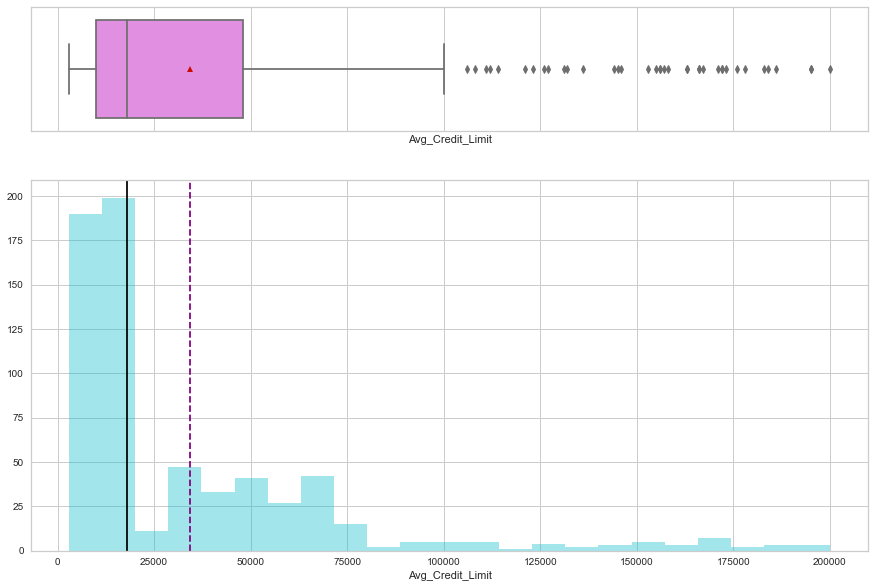

In [20]:
histogram_boxplot(data['Avg_Credit_Limit'])

* Avg_Credit_Limit is right skewed with average credit limit of near 35K and median of 18K. 
* From the boxplot, we can see that there are a few outliers.

### Observations on Total_Credit_Cards

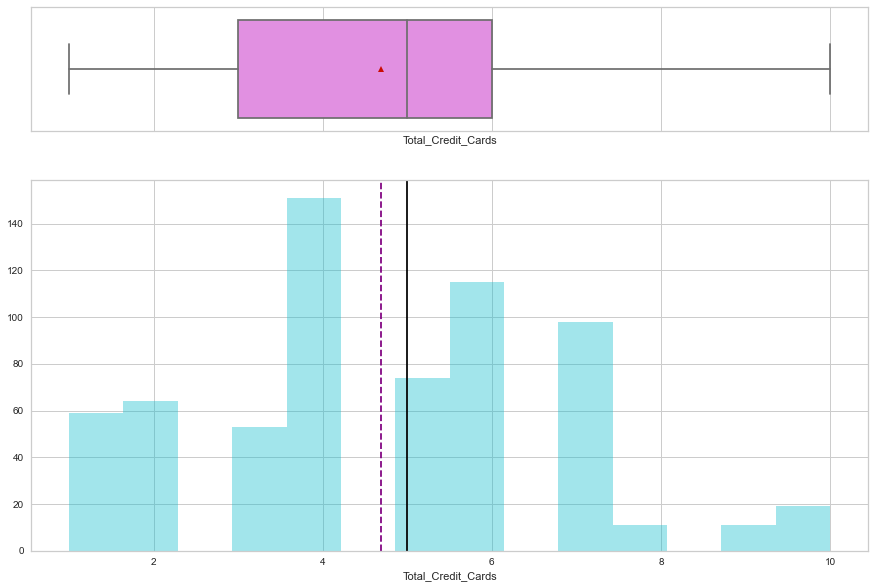

In [21]:
histogram_boxplot(data['Total_Credit_Cards'])

* The customers are having 1 to 10 credit cards with mean near to 5 and median equal to 5.

### Observations on Total_visits_bank

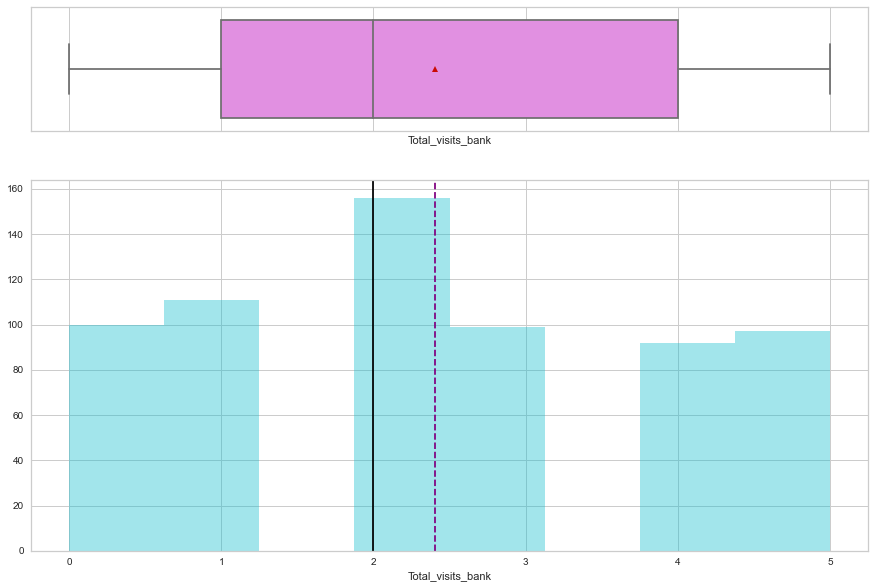

In [22]:
histogram_boxplot(data['Total_visits_bank'])

* Total number of bank visits for the customers are from 0 to 5, more of normally distributed with avearage of 2.4.

### Observations on Total_visits_online

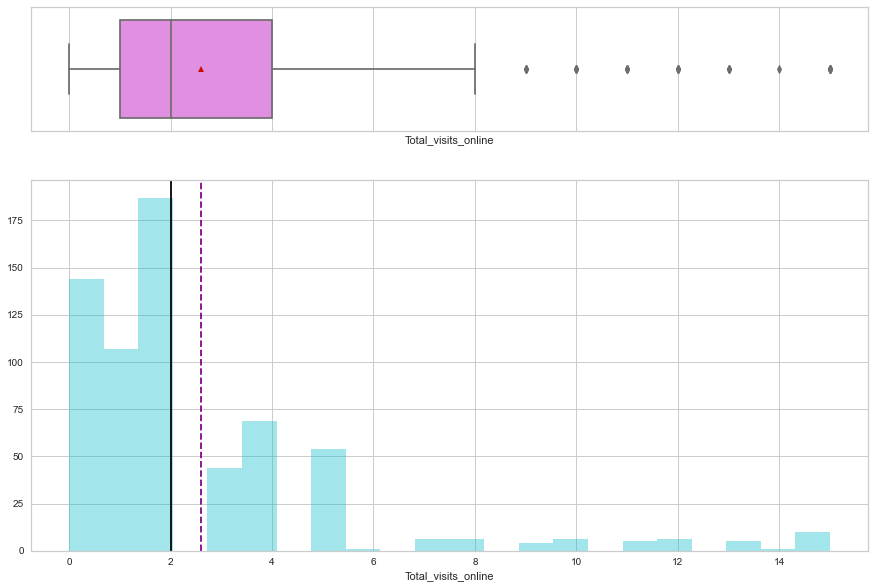

In [23]:
histogram_boxplot(data['Total_visits_online'])

* Total number of online visits made by customer are having few outliers who made more than 6-7 and as high as 15.
* Most the customer have less than 6 visits.

### Observations on Total_calls_made

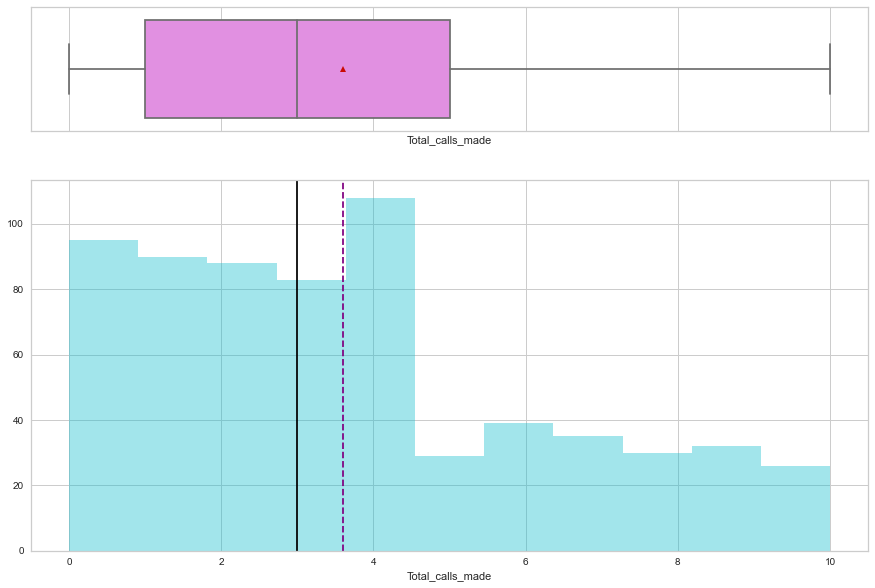

In [24]:
histogram_boxplot(data['Total_calls_made'])

* The average number of calls made by customers range is 3.5 with median 3.

In [25]:
# Function to create the bar plots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    '''
    

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on Total Credit Cards

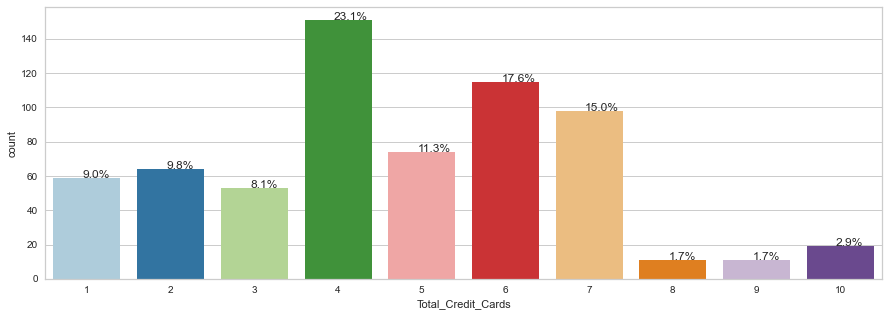

In [26]:
perc_on_bar('Total_Credit_Cards')

**More than 65% of customers are having 4 to 7 number of credit cards.**

### Observations on Total_visits_bank

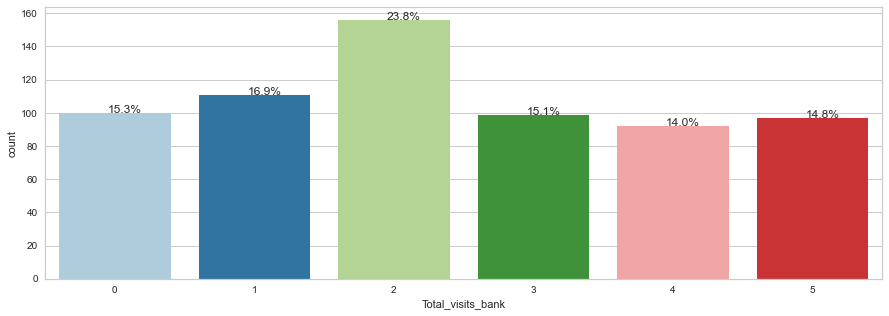

In [27]:
perc_on_bar('Total_visits_bank')

**Nearly uniform distribution was seen for number of visits of the customers, with a bit higer percentage (23.9%) have visited the bank twice.**

### Observations on Total_visits_online

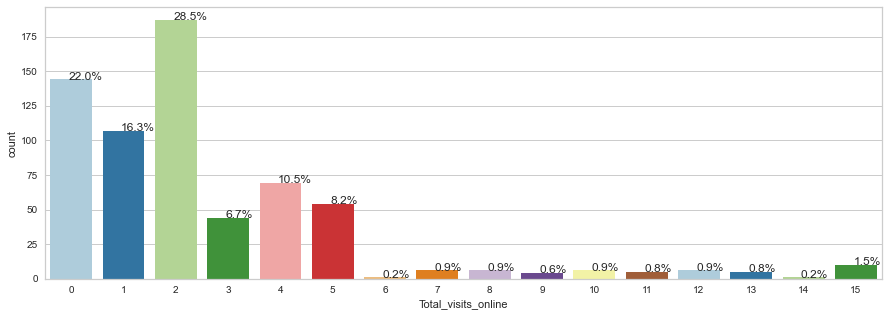

In [28]:
perc_on_bar('Total_visits_online')

- 21.8% of customers have never visited the online service.
- 66.9% of customers have visted online twice or less.

### Observations on Total_calls_made

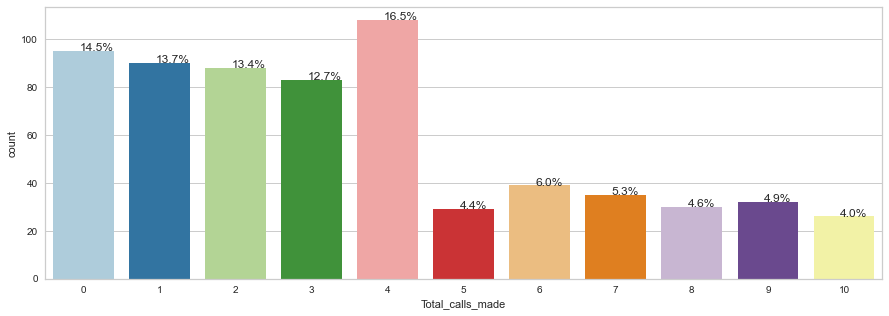

In [29]:
perc_on_bar('Total_calls_made')

* Only 7.5% of the customers were inactive for more than 3 months.

## Bivariate Analysis

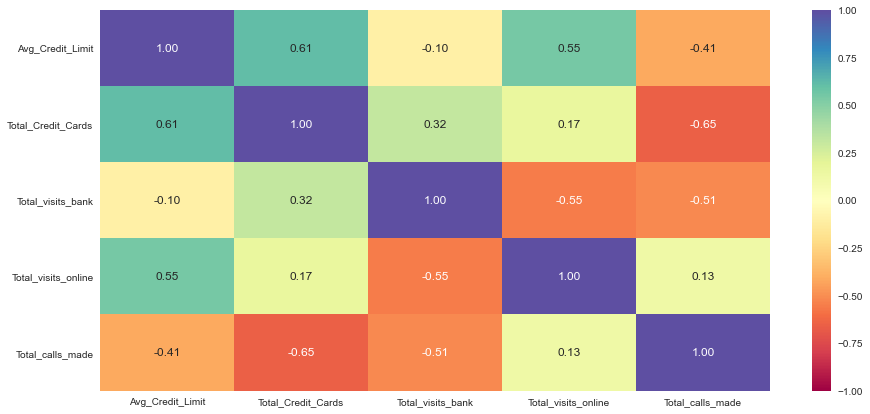

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

-  There is good negative correlation between Total_visits_bank and Total_visits_online, that shows the customers that are vsisiting bank are no more often using online service.
- There is also a good neegative correalation of (-0.51) between Total_visits_bank and Total_calls_made , that infers the similar trend that customers who are viting bank more often, doesn't use call service.
- Total_Credit_Cards and Total_calls_made are also having some negative correlation.

<Figure size 1080x504 with 0 Axes>

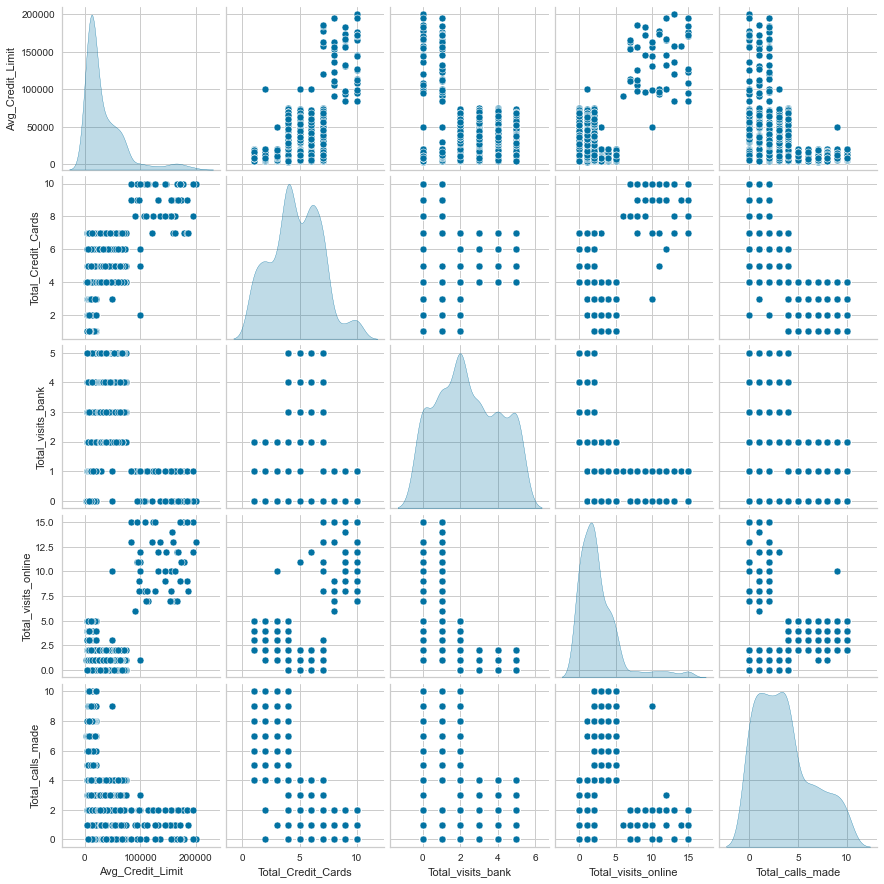

In [31]:
plt.figure(figsize=(15,7))
sns.pairplot(data,diag_kind='kde')
plt.show()

-  There is good negative correlation between Total_visits_bank and Total_visits_online, that shows the customers that are vsisiting bank are no more often using online service.
- There is also a good neegative correalation of (-0.51), that infers the similar trend that customers who are viting bank more often, doesn't use call service.

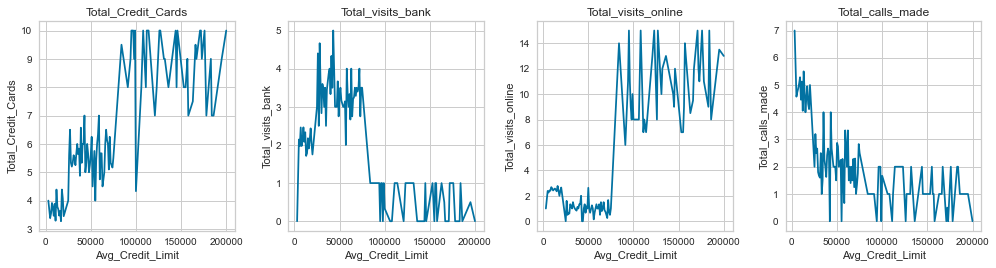

In [32]:
cols = data[['Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']].columns.tolist()
plt.figure(figsize=(14,14))
for i, variable in enumerate(cols):
                     plt.subplot(4,4,i+1)
                     sns.lineplot(data['Avg_Credit_Limit'],data[variable],ci=0)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

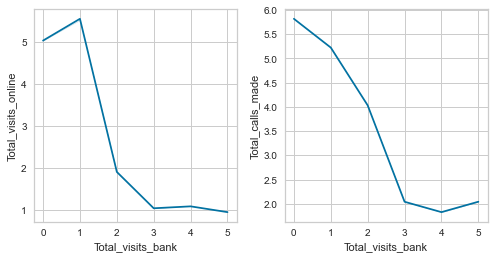

In [33]:
cols = data[['Total_visits_online', 'Total_calls_made']].columns.tolist()
plt.figure(figsize=(14,14))
for i, variable in enumerate(cols):
                     plt.subplot(4,4,i+1)
                     sns.lineplot(data['Total_visits_bank'],data[variable],ci=0)
                     plt.tight_layout()
                     plt.title('')
plt.show()

## <a id = "link3"></a> Insights based on EDA

## <a id = "link4"></a> Data Pre-Processing

**Let's find the percentage of outliers, in each column of the data, using IQR.**

In [34]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [35]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Avg_Credit_Limit      5.802
Total_Credit_Cards    0.000
Total_visits_bank     0.000
Total_visits_online   5.649
Total_calls_made      0.000
dtype: float64

* After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in age, the total amount of transactions, number of transactions, etc) and we would want our model to learn the underlying pattern for such customers.

**KDE plot for all the features to see how many of it can show separate clusters.**

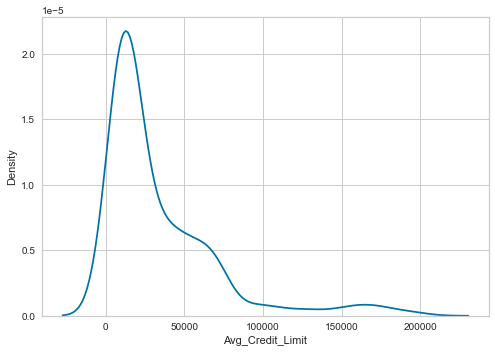

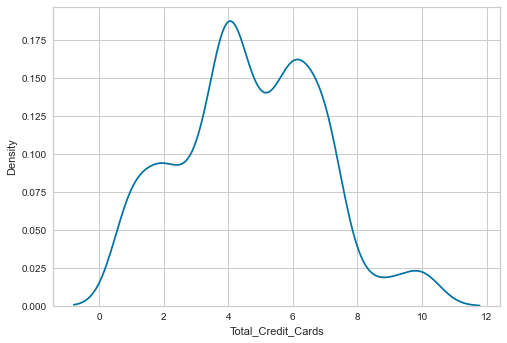

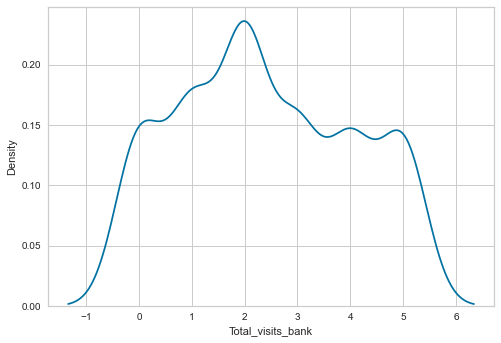

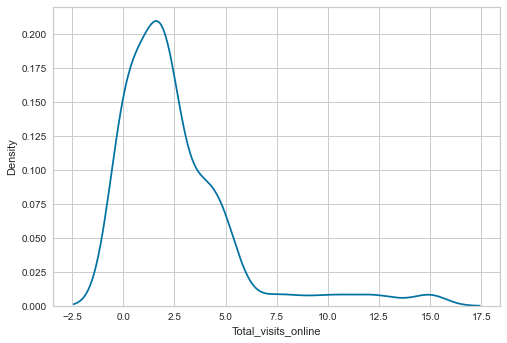

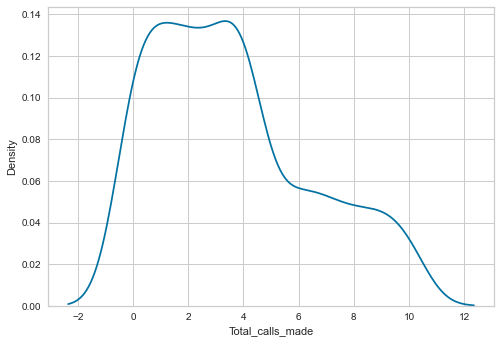

In [36]:
import seaborn as sns

for i in data.columns:
    sns.distplot(data[i],hist=False,)
    plt.show()

- A
- B
- C

### Data Preparation

In [37]:
df=data.copy()

In [38]:
## outlier treatment
def outliers_action(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def outliers_action_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = outliers_action(df,c)
        
    return df

In [39]:
col = df.select_dtypes(include=np.number).columns.tolist()

In [40]:
df = outliers_action_all(df,col)

In [41]:
# Scaling the data set before clustering
subset=df[col].copy()

## <a id = "link5"></a> K-means clustering

Number of Clusters: 1 	Average Distortion: 2.072726772677173
Number of Clusters: 2 	Average Distortion: 1.4967653920727442
Number of Clusters: 3 	Average Distortion: 1.1814045846829255
Number of Clusters: 4 	Average Distortion: 1.0708089951859554
Number of Clusters: 5 	Average Distortion: 1.004446798132049
Number of Clusters: 6 	Average Distortion: 0.9513249907297431
Number of Clusters: 7 	Average Distortion: 0.9155017208597979
Number of Clusters: 8 	Average Distortion: 0.8941944658577501


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

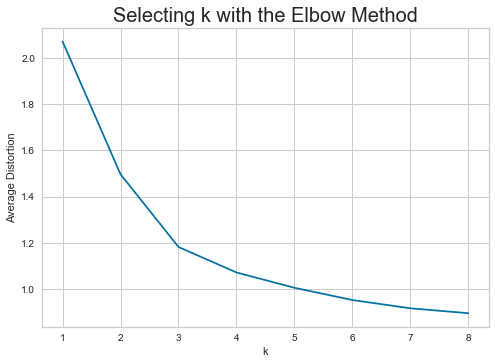

In [42]:
clusters=range(1,9)
meanDistortions=[]



for k in clusters:
    ##creating pipeline
    preprocessor = Pipeline([("scaler", StandardScaler()),])
    clusterer = Pipeline([("kmeans",KMeans(
                       n_clusters=k,random_state=1
                       ))])

    pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
    
    pipe.fit(subset)
    
    #predicted_labels = pipe["clusterer"]["kmeans"].labels_
    #prediction=pipe.predict(subset_scaled_df)
    subset_scaled_df = pipe["preprocessor"].transform(subset)
    
    distortion=sum(np.min(cdist(subset_scaled_df, pipe["clusterer"]["kmeans"].cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

In [43]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    preprocessor = Pipeline([("scaler", StandardScaler()),])
    clusterer = Pipeline([("kmeans",KMeans(
                       n_clusters=n_clusters,random_state=1
                       ))])

    pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
    
    pipe.fit(subset)
    
    preds = pipe["clusterer"]["kmeans"].labels_
    subset_scaled_df = pipe["preprocessor"].transform(subset)
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42032874983754825)
For n_clusters = 3, silhouette score is 0.5167625076684884)
For n_clusters = 4, silhouette score is 0.3818290382313433)
For n_clusters = 5, silhouette score is 0.3532432526005197)
For n_clusters = 6, silhouette score is 0.27153522423965365)
For n_clusters = 7, silhouette score is 0.26624166752430767)
For n_clusters = 8, silhouette score is 0.25226730950855714)
For n_clusters = 9, silhouette score is 0.24208785453878098)


Text(0.5, 1.0, 'silhouette score for different number of clusters')

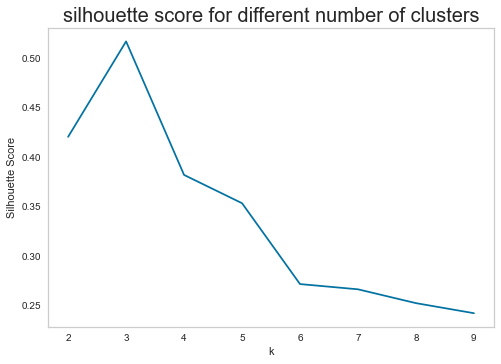

In [44]:
plt.plot(cluster_list,sil_score)
plt.grid()
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('silhouette score for different number of clusters', fontsize=20)

- We are getting maximum silhouette score of 0.52 for number of clusters =3.

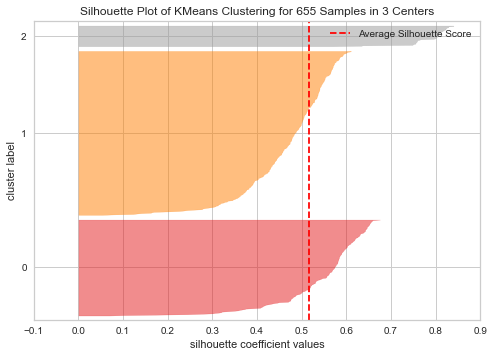

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 655 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

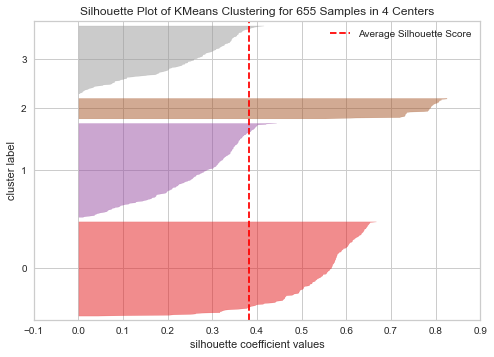

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 655 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

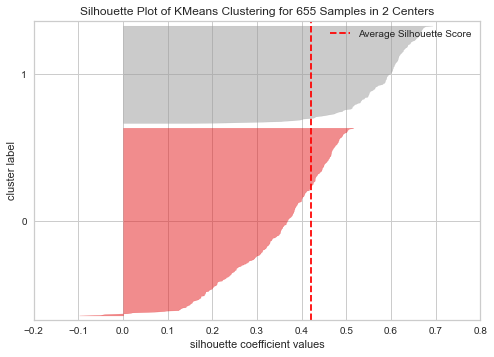

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 655 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

**From above analysis, n=3 can be a good choice for the clustering.**

-------

## K Means Clustering with number of clusters =3

In [48]:
preprocessor = Pipeline([("scaler", StandardScaler()),])
clusterer = Pipeline([("kmeans",KMeans(
                   n_clusters=3,random_state=29
                   ))])

pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

pipe.fit(subset) #fitting to the model
df_k = df.copy()
df_k['K_means_segments'] = pipe["clusterer"]["kmeans"].labels_ #cluster labels

In [49]:
cluster_profile_k = df_k.groupby('K_means_segments').mean()
cluster_profile_k['count_in_each_segment'] = df_k.groupby('K_means_segments')['Total_Credit_Cards'].count().values

In [50]:
cluster_profile_k

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33604.712,5.505,3.495,0.976,2.005,382
1,12174.107,2.411,0.933,3.547,6.871,224
2,102612.245,8.776,0.592,8.204,1.102,49


<AxesSubplot:xlabel='K_means_segments'>

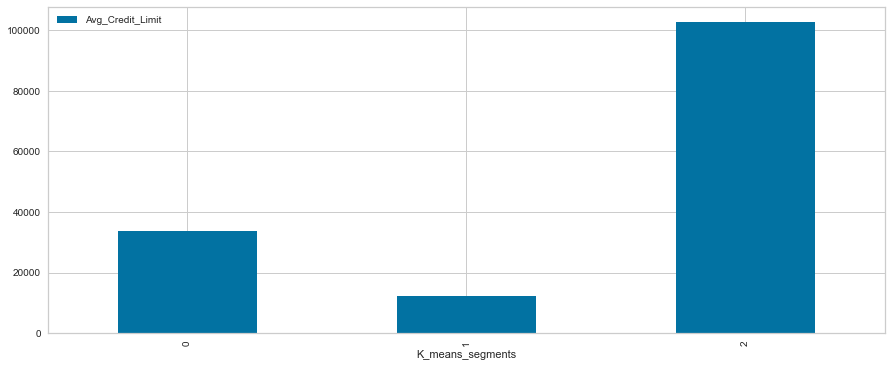

In [51]:
df_k[['Avg_Credit_Limit','K_means_segments']].groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

<AxesSubplot:xlabel='K_means_segments'>

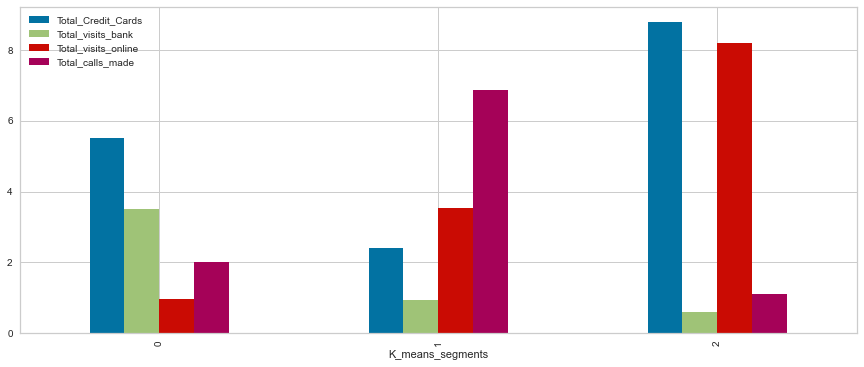

In [52]:
df_k[['Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'K_means_segments']].groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

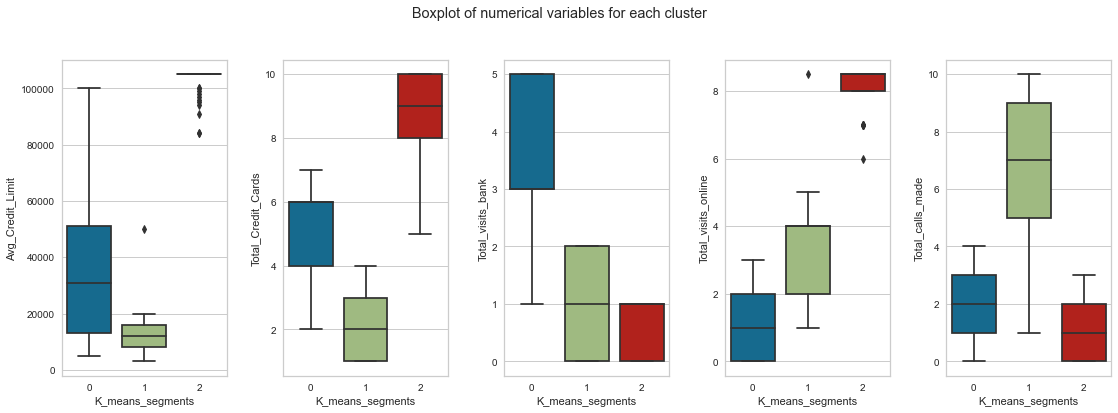

In [53]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df_k[col[counter]],x=df_k['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

-------

## <a id = "link6"></a> Hierarchical clustering

**Comparing different Lonkage method and distance metrics for the different dendogram**

In [54]:
method = ['single','complete','average','weighted']
metric = ['euclidean','chebyshev','cityblock']
i=0
compare = pd.DataFrame(columns = ['Method','Metric','Cophenet Index'])

for m in method:
    for met in metric:
        Z = linkage(subset_scaled_df, method = m, metric =met )
        c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
        compare.append([m,met,c])
        compare.loc[i] =[m,met,c]
        i=i+1

method2 =['ward','centroid']
# Method 'ward' and 'centroid' requires the distance metric to be Euclidean    
for m in method2:
        Z = linkage(subset_scaled_df, method = m, metric ='euclidean' )
        c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
        compare.append([m,'euclidean',c])
        compare.loc[i] =[m,'euclidean',c]
        i=i+1


In [55]:
compare.sort_values(by = 'Cophenet Index', ascending= False).reset_index(drop=True)
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

,Method,Metric,Cophenet Index
0,average,euclidean,0.893
1,average,cityblock,0.892
2,average,chebyshev,0.892
3,weighted,euclidean,0.891
4,centroid,euclidean,0.890
5,weighted,chebyshev,0.870
6,complete,chebyshev,0.852
7,complete,cityblock,0.832
8,weighted,cityblock,0.821
9,complete,euclidean,0.819


**Based on above table we can see 'average' method here gives the best cophenet constant among all.**

0.892400226600149

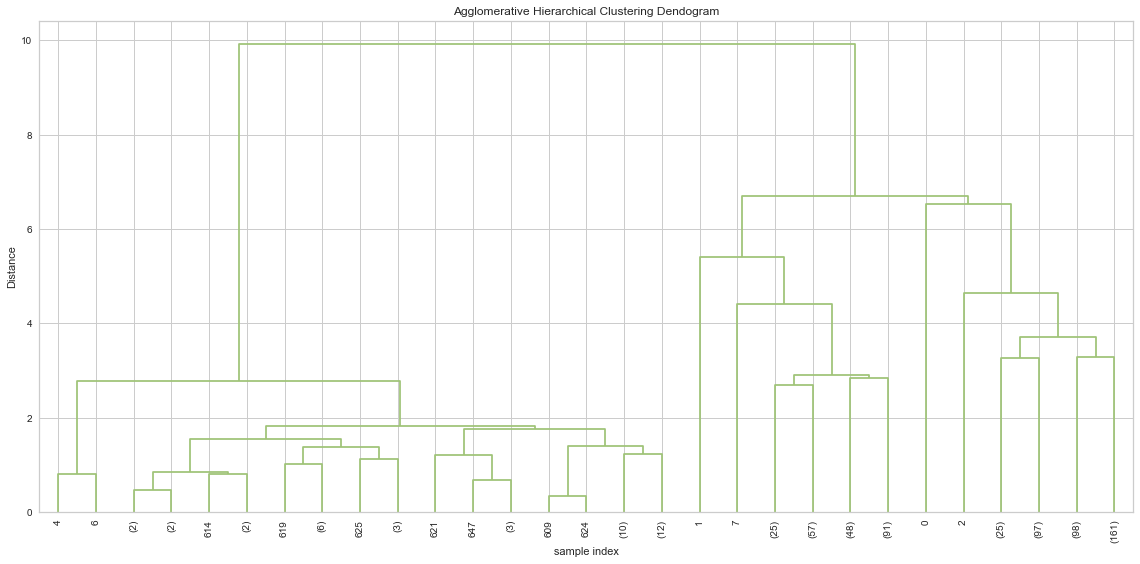

In [56]:
plt.figure(figsize=(16, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subset_scaled_df, method = 'average',metric ='cityblock')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

c

### Linkage Matrix

In [57]:
#### generate the linkage matrix
Z = linkage(subset_scaled_df, 'average', metric='cityblock')
Z.shape

(654, 4)

In [58]:
Z[:]

array([[ 461.        ,  494.        ,    0.        ,    2.        ],
       [ 423.        ,  452.        ,    0.        ,    2.        ],
       [ 250.        ,  360.        ,    0.        ,    2.        ],
       ...,
       [   0.        , 1304.        ,    6.52701247,  383.        ],
       [1305.        , 1306.        ,    6.69350645,  606.        ],
       [1296.        , 1307.        ,    9.91977033,  655.        ]])

### Dendrogram for the consolidated dataframe

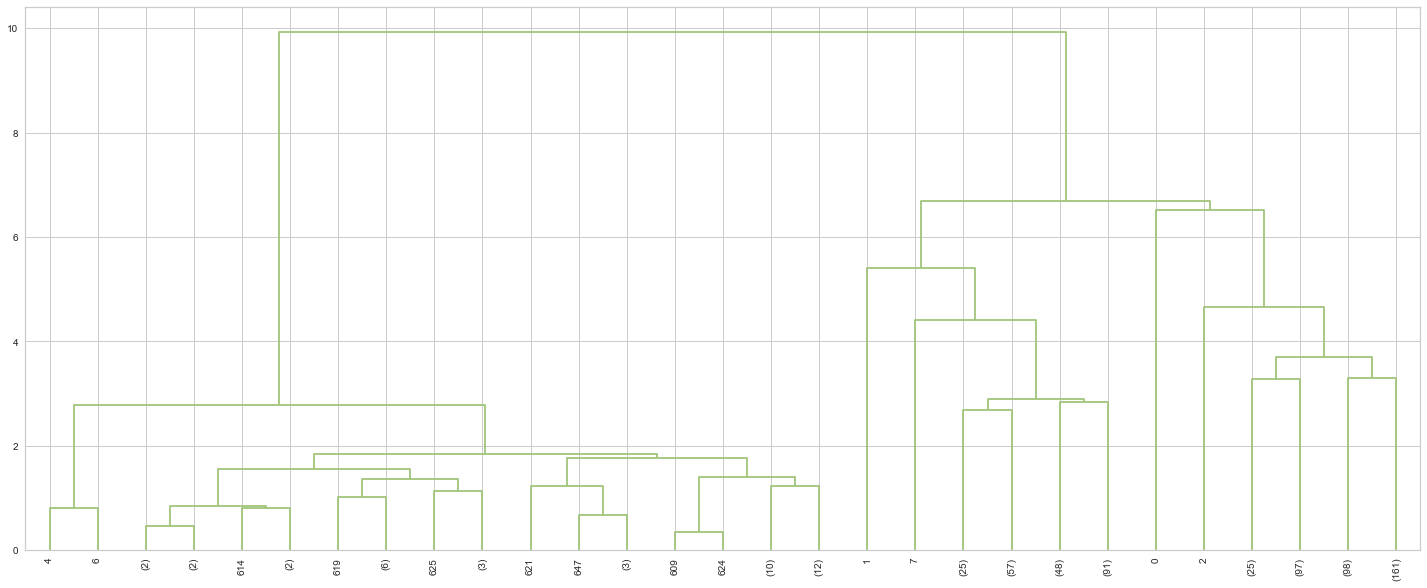

In [59]:
plt.figure(figsize=(25, 10))
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.show()

Recreate the dendrogram for last 12 merged clusters

### From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

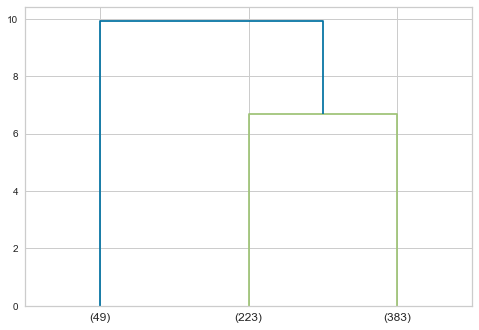

In [60]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [61]:
max_d = 6

### Use this distance measure(max_d) and fcluster function to cluster the data 

In [62]:
clusters = fcluster(Z, max_d, criterion='distance')
pd.DataFrame(clusters).value_counts()

3    382
2    223
1     49
4      1
dtype: int64

In [63]:
# Calculate Avg Silhoutte Score
silhouette_score(subset_scaled_df,clusters)

0.48103800614024916

### Dendogram with 'complete linkage'

0.8187995987904191

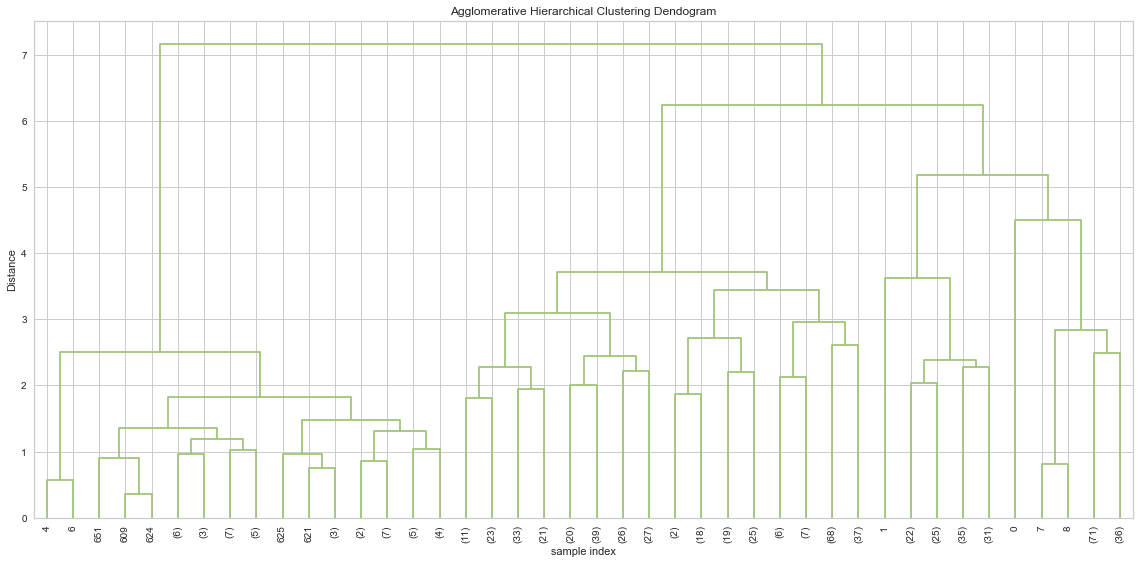

In [64]:
plt.figure(figsize=(16, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subset_scaled_df, method = 'complete',metric ='euclidean')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

c

In [65]:
max_d = 6

In [66]:
clusters = fcluster(Z, max_d, criterion='distance')
pd.DataFrame(clusters).value_counts()

2    382
3    224
1     49
dtype: int64

In [67]:
# Calculate Avg Silhoutte Score
silhouette_score(subset_scaled_df,clusters)

0.5158882520986444

### Here the silhouette score achieved is 0.515 better than the earlier one in 'average linkage'

In [68]:
df_hc = df.copy()

In [89]:
df_hc['hc_clusters'] = (clusters+1)%3 #just to re-arrance the cluster number

In [90]:
cluster_profile_hc = df_hc.groupby('hc_clusters').mean()
cluster_profile_hc['count_in_each_segment'] = df_hc.groupby('hc_clusters')['Total_Credit_Cards'].count().values

In [91]:
cluster_profile_hc

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
hc_clusters,,,,,,
0,33361.257,5.510,3.497,0.979,2.016,382
1,12589.286,2.402,0.929,3.542,6.853,224
2,102612.245,8.776,0.592,8.204,1.102,49


----

## <a id = "link7"></a> Comparing cluster K-means clusters and Hierarchical clusters

**Cluster Segments through K-means**

In [92]:
cluster_profile_k

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33604.712,5.505,3.495,0.976,2.005,382
1,12174.107,2.411,0.933,3.547,6.871,224
2,102612.245,8.776,0.592,8.204,1.102,49


**Cluster Segments through Hierarchial Clustering**

In [93]:
cluster_profile_hc

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
hc_clusters,,,,,,
0,33361.257,5.510,3.497,0.979,2.016,382
1,12589.286,2.402,0.929,3.542,6.853,224
2,102612.245,8.776,0.592,8.204,1.102,49


- We can see clustering from both the method K-menas and Hierarchial technique, are quite similar and have similar profile.
- Though there are two customer that has been assigned to different clusters in above two methods, while the number of customers in segments are equal.

### Customer that has been assigned to differenr segment in two different methods

In [94]:
df['K_means_segments'] = df_k['K_means_segments']
df['hc_clusters'] = df_hc['hc_clusters']
df['different cluster'] = df['K_means_segments'] - df['hc_clusters']

In [95]:
df[df['different cluster'] != 0]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,hc_clusters,different cluster
0,100000,2,1,1.000,0,0,1,-1
313,7000,4,2,2.000,4,1,0,1


---------

**These two customers are assigned in different segments in K-Means and Hierarchial clustering with chosen parameters.**


---------

## <a id = "link8"></a> Cluster profiling and Insights

In [97]:
##since both clustering techniques are giving the simiilar result, thus let's analyze any one the method to come up with Cluster profile -

In [76]:
cluster_profile_k

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33604.712,5.505,3.495,0.976,2.005,382
1,12174.107,2.411,0.933,3.547,6.871,224
2,102612.245,8.776,0.592,8.204,1.102,49


<AxesSubplot:xlabel='K_means_segments'>

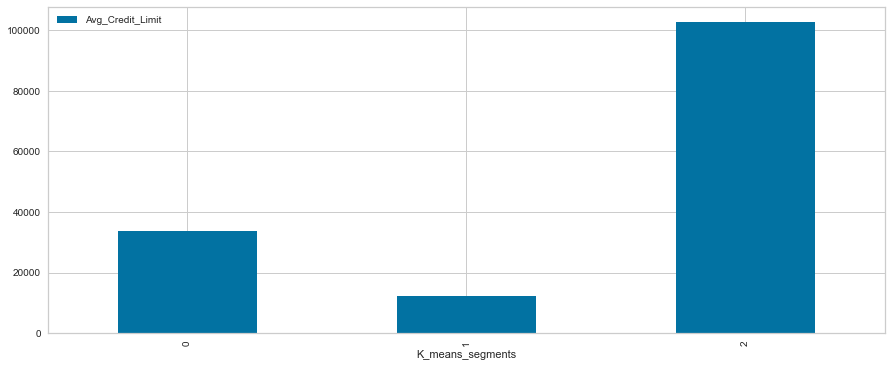

In [77]:
df_k[['Avg_Credit_Limit','K_means_segments']].groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

<AxesSubplot:xlabel='K_means_segments'>

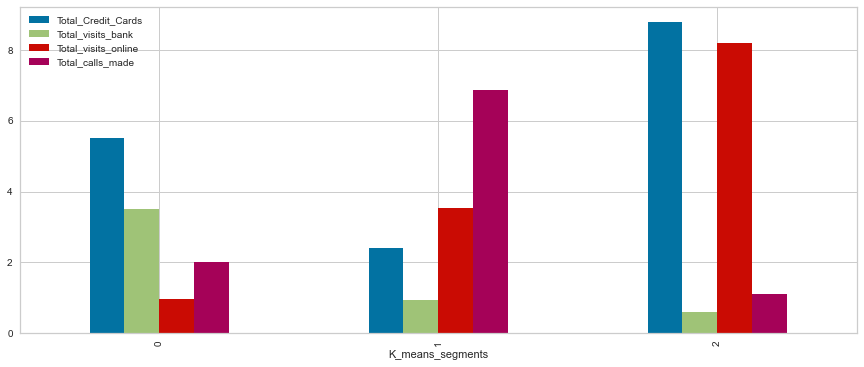

In [78]:
df_k[['Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'K_means_segments']].groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

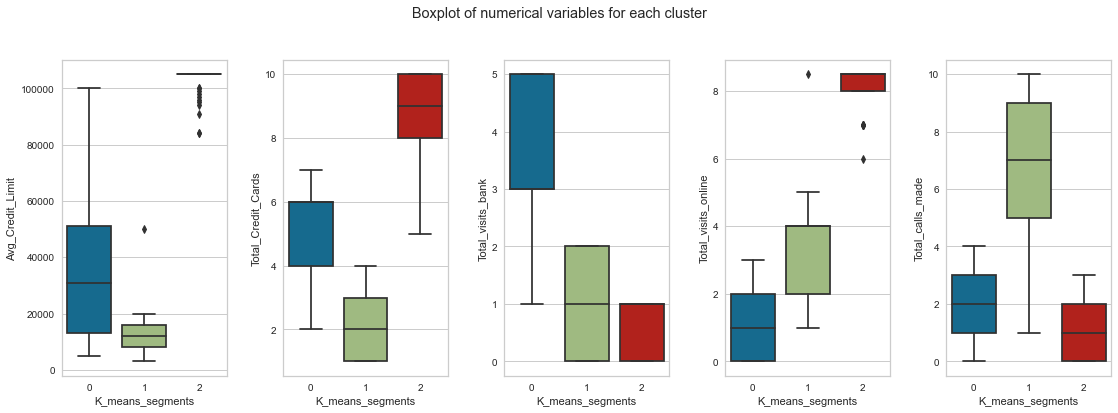

In [79]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df_k[col[counter]],x=df_k['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

## Cluster Profile | Summary

In [98]:
pd.DataFrame([['Cluster-0','Average Credit Customer','Visiting Banks','Average',382],['Cluster-1','Low Credit Customer','Calls','Low',224]
              ,['Cluster-2','High Credit Customer','Online','High',49]], 
             columns=['Customer Segment','Credit Amount','Preferred Customer Support Channel',
                      'Number of Credit Card','Customer Count in the segment'])

,Customer Segment,Credit Amount,Preferred Customer Support Channel,Number of Credit Card,Customer Count in the segment
0,Cluster-0,Average Credit Customer,Visiting Banks,Average,382
1,Cluster-1,Low Credit Customer,Calls,Low,224
2,Cluster-2,High Credit Customer,Online,High,49


## Thus we can see three customer segments coming out of the shared customers data,
1. Customer segment belonging to Cluster-0, are average credit customers and reach out for support through vsisiting banks. 
2. Customer segment belonging to Cluster-1, are low credit customers with relatively less number of cards and reach out for support predominantly through call support and online.
3. Customer segment belonging to Cluster-2, are hig credit (and probably high revenue) customers with higher number of cards and reach out for support mainly through call online support.

-----

## <a id = "link9"></a> Actionable Insights & Recommendations

* We have been able to build customer segments:
  a) that represents the specificity of behaviorial attributes of customers of that segments
  b) that company can focus on to build more customer-specific changes to improve the service and to ensure customer satisfaction 
  c) based on which company can take appropriate marketing strategy to grow the customer base and revenue. 

* Attribites that defines the different customer segments - **Average Credit Limit**, **Total Number of Credit Cards** and  **Customer Support Channels**.

* **Average Credit Limit**: Customers with lower income is more likey to buy the Basic and Deluxe package, which is also logical considering the disposable income of the customers.

* **Total Number of Credit Cards**: We have seen a clear indication that there is correlation between packages and the age of cutomers, the young cutomers or solo cutomers most likely to buy the economical packages where the cutomers with the higher age are most likelly to but high-end packages.

* **Customer Support Channels** :  It was also obseved from the dataset that duration of pitch plays a significant role in converting a deal, which is also reflects the better and deatiled presentation of product would lead to more customers' attraction towards the package.

**Thus cutomer segmentation based on the attributes and target-based marketing of the travel product leveraging the designed model can help reach the company both the objective of acquiring higher customer base and reducing marketing expenditure.**